In [15]:
!pip install tensorflow pandas scikit-learn matplotlib -q

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.26.4 which is incompatible.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [17]:
fake = pd.read_csv('C:/Users/Saranya/OneDrive/Documents/GBC/DL1/Fake_News/True.csv')
true = pd.read_csv('C:/Users/Saranya/OneDrive/Documents/GBC/DL1/Fake_News/Fake.csv')

fake["label"] = 1  # Fake = 1
true["label"] = 0  # Real = 0

data = pd.concat([fake, true])
data = data[["text", "label"]].sample(frac=1).reset_index(drop=True)


In [19]:
X = data["text"]
y = data["label"]

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
padded = pad_sequences(sequences, maxlen=500)

X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)


In [20]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=500))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


C:\Users\Saranya\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 468s 810ms/step - accuracy: 0.9066 - loss: 0.2284 - val_accuracy: 0.9870 - val_loss: 0.0472
Epoch 2/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 510s 909ms/step - accuracy: 0.9844 - loss: 0.0524 - val_accuracy: 0.9878 - val_loss: 0.0428
Epoch 3/3
562/562 ━━━━━━━━━━━━━━━━━━━━ 424s 755ms/step - accuracy: 0.9907 - loss: 0.0331 - val_accuracy: 0.9725 - val_loss: 0.1086


In [22]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=["Real", "Fake"]))

281/281 ━━━━━━━━━━━━━━━━━━━━ 35s 124ms/step - accuracy: 0.9722 - loss: 0.1035
Test Accuracy: 0.9725
281/281 ━━━━━━━━━━━━━━━━━━━━ 38s 130ms/step
              precision    recall  f1-score   support

        Real       1.00      0.95      0.97      4669
        Fake       0.95      1.00      0.97      4311

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



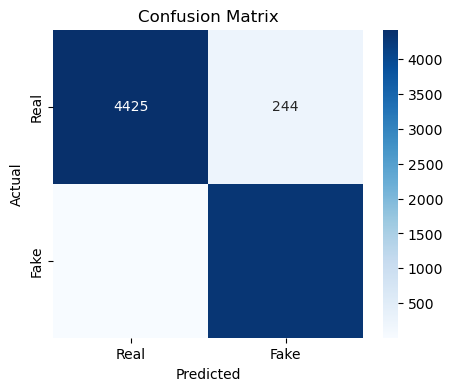

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [24]:
model.save("C:/Users/Saranya/OneDrive/Documents/GBC/DL1/lstm_fake_news_model.keras")